In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np


In [2]:
head_results = np.array(
[[0.0921, 0.0663, 0.0728],
[0.0956, 0.0725, 0.0598],
[0.0982, 0.0729, 0.0618],
[0.0812, 0.0654, 0.0540],
[0.0874, 0.0700, 0.0570],
[0.0955, 0.0781, 0.0646],
[0.0975, 0.0798, 0.0666],
[0.0965, 0.0805, 0.0752],
[0.0805, 0.0710, 0.0593],
[0.0876, 0.0719, 0.0599]])
print(head_results.shape)

(10, 3)


In [3]:
backbone_results = np.array([
[0.0034, 0.0014, 0.0014],
[0.0005, 0.0005, 0.0005],
[0.0455, 0.0227, 0.0227],
[0.0455, 0.0455, 0.0455],
[0.0036, 0.0016, 0.0016],
[0.0182, 0.0091, 0.0091],
[0.0051, 0.0029, 0.0029],
[0.0152, 0.0065, 0.0065],
[0.0013, 0.0006, 0.0015],
[0.0041, 0.0035, 0.0035],
])
print(backbone_results.shape)

(10, 3)


(0.0, 0.1)

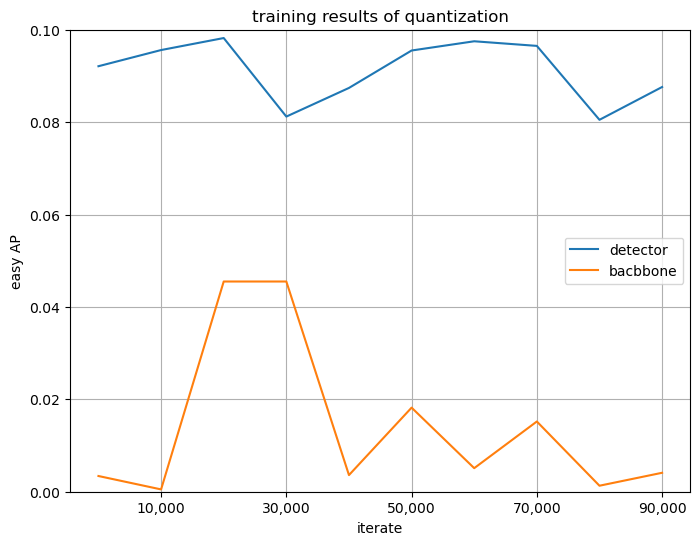

In [4]:
plt.figure(figsize=(8,6))
plt.plot(head_results[:,0], label='detector')
plt.plot(backbone_results[:,0], label='bacbbone')
plt.legend()
plt.title('training results of quantization')
plt.xlabel('iterate')
x = [1,3,5,7,9]
values = ['10,000','30,000','50,000','70,000','90,000']
plt.xticks(x, values)
plt.ylabel('easy AP')
plt.grid(True)
plt.ylim((0.00, 0.1))


In [11]:
output_path = '/media/hdd/jhkim/git/M3D-RPN/output'

model_list = [
'kitti_3d_multi_quan2x2_resnet50_lr',
'kitti_3d_multi_quan4x4_resnet50_lr',
'kitti_3d_multi_quan8x8_resnet50_lr',
'kitti_3d_multi_quan16x16_resnet50_lr',]
# 'kitti_3d_multi_quan4x4_resnet50',
# 'kitti_3d_multi_quan8x8_resnet50',
# 'kitti_3d_multi_quan16x16_resnet50',
# 'kitti_3d_multi_quan8x8_resnet50_lr',
# 'kitti_3d_multi_quan8x8_resnet50_lr_head',]

loss_dict = {}
for model in model_list:
    model_full_path_log = os.path.join(output_path, model, 'log')
    print(model_full_path_log)
    log_file = sorted(os.listdir(model_full_path_log), reverse= True)[0]
    
    log_full_path = os.path.join(model_full_path_log, log_file)
    print(log_full_path)
    f = open(log_full_path, 'r')
    line = f.readline()
    
    loss_list = []
    a = 0
    while True:
        line = f.readline()
        a += 1 
        if not line: break
        if ' iter: ' in line:
            new_line = line.split('loss (bbox_3d: ')[1]
            loss = new_line.split(',')[0]
            loss_list.append(float(loss))
    
    # if len(loss_list) == 0:
    #     print(loss_list)
    #     f = open(log_full_path, 'r')
    #     line = f.readline()
    #     while True:
    #         line = f.readline()
    #         if not line: break
    #         print(line)
    loss_dict[model] = loss_list

print(len(loss_dict))
        
    
    
    

/media/hdd/jhkim/git/M3D-RPN/output/kitti_3d_multi_quan2x2_resnet50_lr/log


IndexError: list index out of range

kitti_3d_multi_quan2x2_resnet50_lr_head
kitti_3d_multi_quan4x4_resnet50_lr_head
kitti_3d_multi_quan8x8_resnet50_lr_head
kitti_3d_multi_quan16x16_resnet50_lr_head


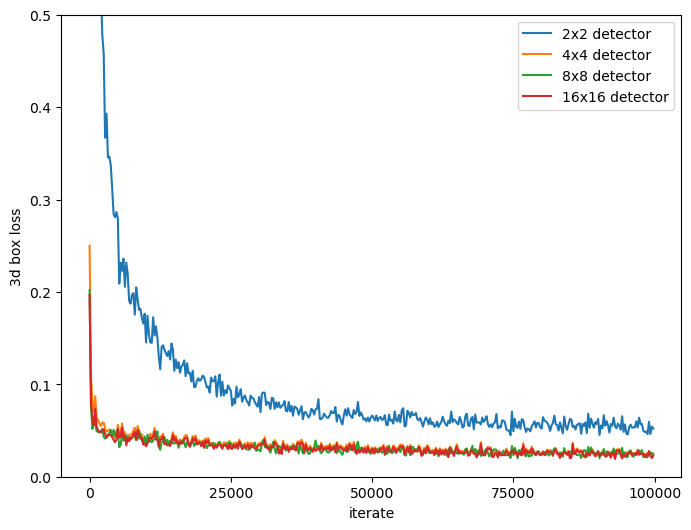

In [10]:
plt.figure(figsize=(8,6))
x = range(0, 401, 100)
value = [i * 250 for i in x]
for k, v in loss_dict.items():
    print(k)
    k_temp = k.split('_')[-1]
    head = False
    lr = False
    if k_temp == 'head':
        head = True
    if k_temp == 'lr':
        lr = True
    k_temp = k.split('_multi_quan')[1]
    k_temp = k_temp.split('_')[0]
    if lr == True:
        k_temp = k_temp + ' lr'
    if head == True:
        k_temp = k_temp + ' detector'
    if k_temp == '2x2' or k_temp == '16x16':
        continue
    plt.plot(v, label = k_temp)
    plt.ylim((0,0.5))
    plt.xticks(x, value)
    plt.xlabel('iterate')

    plt.ylabel('3d box loss')
    plt.legend()
plt.show()

In [45]:
x88 = [0.03299346804618836 0.02248806118965149]

In [15]:
result_list = [[0.0604, 0.0483, 0.0358], [0.0931, 0.0724, 0.0587], [0.0921, 0.0663, 0.0728], [0.0986, 0.0758, 0.0623], [0.0951, 0.0718, 0.0590]]
plot_name = ['2x2', '4x4', '8x8', '16x16', 'baseline']
# result_list = [[0.0982, 0.0729, 0.0618], [0.0455, 0.0227, 0.0227]]
# plot_name = ['8x8_detector', '8x8_backbone']

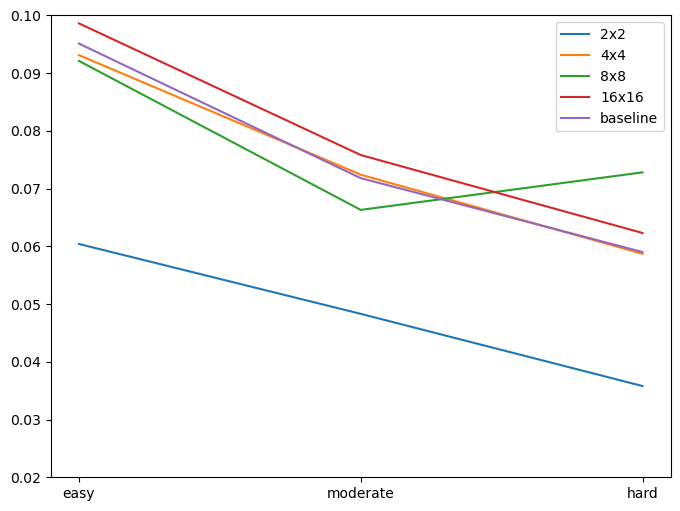

In [16]:
plt.figure(figsize=(8,6))
for i in range(len(result_list)):
    plt.plot(result_list[i], label=plot_name[i])
    plt.xticks([0,1,2], ['easy', 'moderate', 'hard'])
plt.legend()
plt.ylim((0.02, 0.1))
plt.show()

In [10]:
import os
main_result_path = '/media/hdd/jhkim/git/M3D-RPN/output/for_plot/kitti_3d_multi_main_resnet50'
result_list = sorted(os.listdir(main_result_path))
easy_result = {}

for i in range(len(result_list)):
    cur_file = os.path.join(main_result_path, result_list[i])
    f = open(cur_file, 'r')
    b = 0
    while True:
        b += 1
        if b >= 50: 
            break
        a = f.readline()
        if a == None:
            break
        if '3d car' in a:
            iter = int(a.split('3d car --> easy: ')[0].split('test_iter ')[1])
            easy_result[iter] = float(a.split('3d car --> easy: ')[1].split(', mod: ')[0])
            
    f.close()


[(10000, 0.0041), (20000, 0.0183), (30000, 0.1136), (40000, 0.0245), (50000, 0.0499), (60000, 0.0589), (70000, 0.0567), (80000, 0.0797), (90000, 0.0951), (100000, 0.0905)]


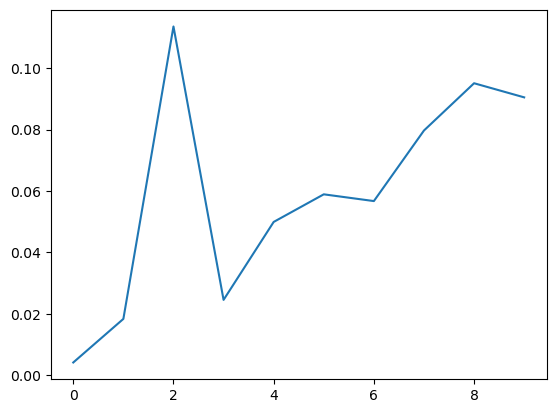

In [12]:
import matplotlib.pyplot as plt
sorted_dict = sorted(easy_result.items())
print(sorted_dict)
easy_list = []
for k,v in sorted_dict:
    easy_list.append(v)
plt.plot(easy_list)
    